In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()


FILE ANALYSIS SUMMARY
📁 File: MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv
📊 Type: CSV
💾 Size: 523.4 KB
📈 Shape: (381, 9)
🔢 Columns: 9
📋 Rows: 381


In [132]:
# Let's examine the agency and line data
print("Agency distribution:")
print(df['Agency'].value_counts())
print("\n" + "="*50)
print("Line distribution (top 20):")
print(df['Line'].value_counts().head(20))


Agency distribution:
Agency
NYCT               293
Metro-North         43
LIRR                39
SIR                  3
MTA Bus Company      2
B&T                  1
Name: count, dtype: int64

Line distribution (top 20):
Line
6                     20
City Terminal Zone    16
2,5                   16
1                     15
Port Jefferson        15
A                     13
F                     13
Q                     12
New Haven             12
Hudson                11
4                     11
Harlem                11
J,Z                   10
D                     10
N                      8
R                      8
2,3                    8
L                      8
7                      8
3                      7
Name: count, dtype: int64


In [133]:
# Create Agency-Material cross-tabulation matrix
agency_material_data = []

for idx, row in df.iterrows():
    agency = row['Agency']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        agency_material_data.append({
            'Agency': agency,
            'Material': material
        })

# Create DataFrame from expanded data
agency_material_df = pd.DataFrame(agency_material_data)

# Create cross-tabulation (crosstab)
agency_material_matrix = pd.crosstab(agency_material_df['Agency'], 
                                      agency_material_df['Material'], 
                                      margins=True, margins_name="Total")

print("Agency-Material Matrix:")
print(f"Shape: {agency_material_matrix.shape}")
print("\nTop materials by agency:")
print(agency_material_matrix.iloc[:5, :10])


Agency-Material Matrix:
Shape: (7, 218)

Top materials by agency:
Material         Acrylic and Metal  Acrylic paint and Lighting elements  \
Agency                                                                    
B&T                              0                                    0   
LIRR                             1                                    0   
MTA Bus Company                  0                                    0   
Metro-North                      0                                    1   
NYCT                             0                                    0   

Material         Aluminum  Aluminum - painted  Bonded Bronze  Bronze  \
Agency                                                                 
B&T                     0                   0              0       0   
LIRR                    1                   0              0       1   
MTA Bus Company         0                   0              0       0   
Metro-North             3                   0   

In [134]:
# Create Line-Material cross-tabulation matrix
# First, let's clean the Line data (remove NaN values)
df_clean_lines = df.dropna(subset=['Line'])

line_material_data = []

for idx, row in df_clean_lines.iterrows():
    line = row['Line']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        line_material_data.append({
            'Line': line,
            'Material': material
        })

# Create DataFrame from expanded data
line_material_df = pd.DataFrame(line_material_data)

# Create cross-tabulation (crosstab)
line_material_matrix = pd.crosstab(line_material_df['Line'], 
                                   line_material_df['Material'], 
                                   margins=True, margins_name="Total")

print("Line-Material Matrix:")
print(f"Shape: {line_material_matrix.shape}")
print("\nTop materials by line (first 10 lines, first 10 materials):")
print(line_material_matrix.iloc[:10, :10])


Line-Material Matrix:
Shape: (114, 214)

Top materials by line (first 10 lines, first 10 materials):
Material         Acrylic and Metal  Acrylic paint and Lighting elements  \
Line                                                                      
1                                0                                    0   
1,2,3                            0                                    0   
1,2,3,N,Q,R,W,S                  0                                    0   
2                                0                                    0   
2, 5                             0                                    0   
2,3                              0                                    0   
2,3,4,5                          0                                    0   
2,5                              0                                    0   
3                                0                                    0   
3,4                              0                                    0   

In [135]:
# Analyze the most active agencies and materials
print("Agencies with most material usage:")
agency_totals = agency_material_matrix.loc[:, 'Total'].sort_values(ascending=False)
print(agency_totals)

print("\nMaterials used most frequently across all agencies:")
material_totals = agency_material_matrix.loc['Total', :].sort_values(ascending=False)
print(material_totals.head(15))

# Remove the 'Total' row and column for cleaner analysis
agency_material_clean = agency_material_matrix.drop('Total', axis=0).drop('Total', axis=1)
print(f"\nClean agency-material matrix shape: {agency_material_clean.shape}")


Agencies with most material usage:
Agency
Total              476
NYCT               365
Metro-North         57
LIRR                45
B&T                  3
MTA Bus Company      3
SIR                  3
Name: Total, dtype: int64

Materials used most frequently across all agencies:
Material
Total              476
Glass mosaic        37
Faceted glass       33
Laminated glass     29
Laminated Glass     17
Glass Mosaic        16
Stainless steel     13
Faceted Glass       13
Ceramic mosaic      10
Bronze               8
Steel                8
Ceramic tile         7
Stainless Steel      6
Aluminum             6
ceramic tile         5
Name: Total, dtype: int64

Clean agency-material matrix shape: (6, 217)


In [136]:
# Analyze the most active lines and materials
print("Lines with most material usage (top 10):")
line_totals = line_material_matrix.loc[:, 'Total'].sort_values(ascending=False)
print(line_totals.head(10))

print("\nMaterials used most frequently across all lines:")
line_material_totals = line_material_matrix.loc['Total', :].sort_values(ascending=False)
print(line_material_totals.head(15))

# Remove the 'Total' row and column for cleaner analysis
line_material_clean = line_material_matrix.drop('Total', axis=0).drop('Total', axis=1)
print(f"\nClean line-material matrix shape: {line_material_clean.shape}")


Lines with most material usage (top 10):
Line
Total                 470
6                      23
City Terminal Zone     21
1                      18
A                      17
Q                      17
2,5                    17
Harlem                 16
Port Jefferson         15
Hudson                 14
Name: Total, dtype: int64

Materials used most frequently across all lines:
Material
Total              470
Glass mosaic        37
Faceted glass       33
Laminated glass     28
Laminated Glass     17
Glass Mosaic        16
Stainless steel     13
Faceted Glass       13
Ceramic mosaic      10
Bronze               8
Steel                8
Ceramic tile         7
Stainless Steel      6
Aluminum             6
glass mosaic         5
Name: Total, dtype: int64

Clean line-material matrix shape: (113, 213)


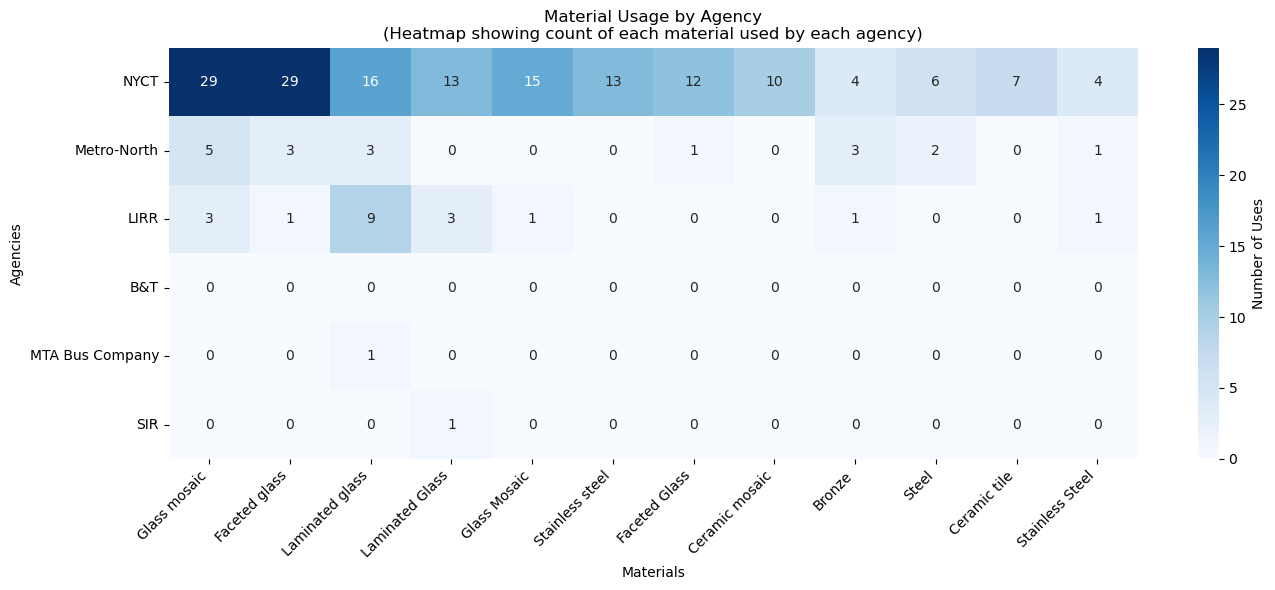

In [137]:
# Create heatmap visualization for Agency-Material relationships
# Focus on top materials for better visualization
top_agency_materials = material_totals.drop('Total').head(12).index.tolist()
all_agencies = agency_totals.drop('Total').index.tolist()

# Create subset matrix for visualization
agency_heatmap_data = agency_material_clean.loc[all_agencies, top_agency_materials]

plt.figure(figsize=(14, 6))
sns.heatmap(agency_heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar_kws={'label': 'Number of Uses'})
plt.title('Material Usage by Agency\n(Heatmap showing count of each material used by each agency)')
plt.xlabel('Materials')
plt.ylabel('Agencies')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


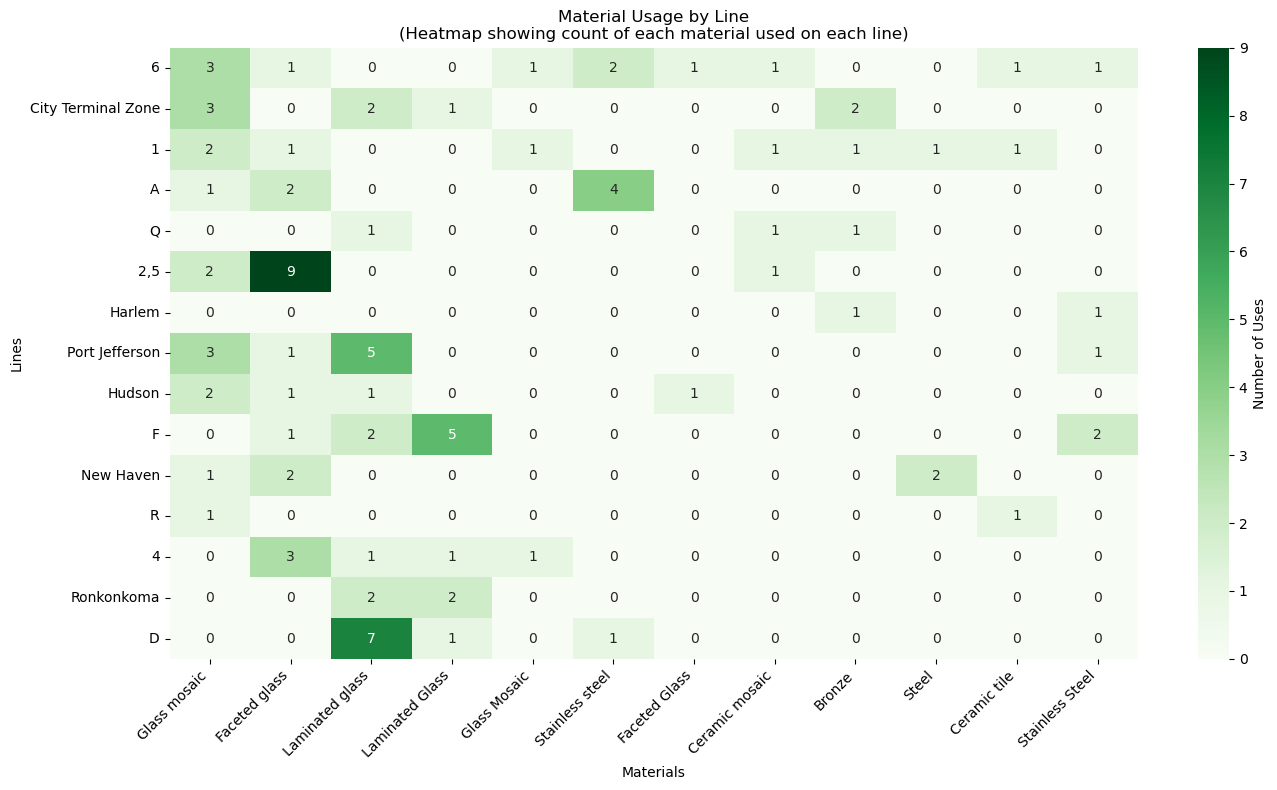

In [138]:
# Create heatmap visualization for Line-Material relationships
# Focus on top lines and materials for better visualization
top_lines = line_totals.drop('Total').head(15).index.tolist()
top_line_materials = line_material_totals.drop('Total').head(12).index.tolist()

# Create subset matrix for visualization
line_heatmap_data = line_material_clean.loc[top_lines, top_line_materials]

plt.figure(figsize=(14, 8))
sns.heatmap(line_heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='Greens', 
            cbar_kws={'label': 'Number of Uses'})
plt.title('Material Usage by Line\n(Heatmap showing count of each material used on each line)')
plt.xlabel('Materials')
plt.ylabel('Lines')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [139]:
# Detailed analysis of agency material preferences
print("AGENCY MATERIAL PREFERENCES ANALYSIS")
print("="*60)

for agency in agency_material_clean.index:
    agency_materials = agency_material_clean.loc[agency]
    used_materials = agency_materials[agency_materials > 0].sort_values(ascending=False)
    
    print(f"\n{agency}:")
    print(f"  Total material instances: {used_materials.sum()}")
    print(f"  Unique materials: {len(used_materials)}")
    print(f"  Top 5 materials:")
    for material, count in used_materials.head(5).items():
        print(f"    {material}: {count}")

# Save matrices for easy access
agency_material_counts = agency_material_clean.copy()
line_material_counts = line_material_clean.copy()

print(f"\nMatrices saved as:")
print(f"• agency_material_counts: {agency_material_counts.shape}")
print(f"• line_material_counts: {line_material_counts.shape}")


AGENCY MATERIAL PREFERENCES ANALYSIS

B&T:
  Total material instances: 3
  Unique materials: 3
  Top 5 materials:
    Clock: 1
    Lighting Elements: 1
    Stainless Steel and Aluminum: 1

LIRR:
  Total material instances: 45
  Unique materials: 32
  Top 5 materials:
    Laminated glass: 9
    Glass mosaic: 3
    Laminated Glass: 3
    Ceramic - porcelain tiles: 2
    planting: 1

MTA Bus Company:
  Total material instances: 3
  Unique materials: 3
  Top 5 materials:
    Laminated glass: 1
    Laminated glass and metal: 1
    Mosaic/Tile: 1

Metro-North:
  Total material instances: 57
  Unique materials: 39
  Top 5 materials:
    Glass mosaic: 5
    Laminated glass: 3
    Powder-coated aluminum fence panels: 3
    Aluminum: 3
    Faceted glass: 3

NYCT:
  Total material instances: 365
  Unique materials: 161
  Top 5 materials:
    Faceted glass: 29
    Glass mosaic: 29
    Laminated glass: 16
    Glass Mosaic: 15
    Laminated Glass: 13

SIR:
  Total material instances: 3
  Unique mate

In [140]:
# Summary statistics and insights
print("AGENCY vs LINE MATERIAL ANALYSIS SUMMARY")
print("="*70)
print(f"Agencies: {len(agency_material_counts)}")
print(f"Lines: {len(line_material_counts)}")
print(f"Unique materials: {len(agency_material_counts.columns)}")

print(f"\nAgency-Material Matrix:")
print(f"  Dimensions: {agency_material_counts.shape[0]} agencies × {agency_material_counts.shape[1]} materials")
print(f"  Non-zero entries: {(agency_material_counts > 0).sum().sum()}")
print(f"  Matrix density: {(agency_material_counts > 0).sum().sum() / (agency_material_counts.shape[0] * agency_material_counts.shape[1]) * 100:.2f}%")

print(f"\nLine-Material Matrix:")
print(f"  Dimensions: {line_material_counts.shape[0]} lines × {line_material_counts.shape[1]} materials")
print(f"  Non-zero entries: {(line_material_counts > 0).sum().sum()}")
print(f"  Matrix density: {(line_material_counts > 0).sum().sum() / (line_material_counts.shape[0] * line_material_counts.shape[1]) * 100:.2f}%")

print(f"\nExample queries:")
print(f"• agency_material_counts.loc['NYCT', :]  # All materials used by NYCT")
print(f"• line_material_counts.loc['6', :]       # All materials used on Line 6")
print(f"• agency_material_counts.loc[:, 'Glass mosaic']  # All agencies using Glass mosaic")
print(f"• line_material_counts.loc['1', 'Bronze']       # Line 1's use of Bronze")


AGENCY vs LINE MATERIAL ANALYSIS SUMMARY
Agencies: 6
Lines: 113
Unique materials: 217

Agency-Material Matrix:
  Dimensions: 6 agencies × 217 materials
  Non-zero entries: 241
  Matrix density: 18.51%

Line-Material Matrix:
  Dimensions: 113 lines × 213 materials
  Non-zero entries: 386
  Matrix density: 1.60%

Example queries:
• agency_material_counts.loc['NYCT', :]  # All materials used by NYCT
• line_material_counts.loc['6', :]       # All materials used on Line 6
• agency_material_counts.loc[:, 'Glass mosaic']  # All agencies using Glass mosaic
• line_material_counts.loc['1', 'Bronze']       # Line 1's use of Bronze


MATERIAL DIVERSITY COMPARISON
            Agency  Unique_Materials  Total_Instances  Diversity_Ratio
0              B&T                 3                3         1.000000
2  MTA Bus Company                 3                3         1.000000
5              SIR                 3                3         1.000000
1             LIRR                32               45         0.711111
3      Metro-North                39               57         0.684211
4             NYCT               161              365         0.441096


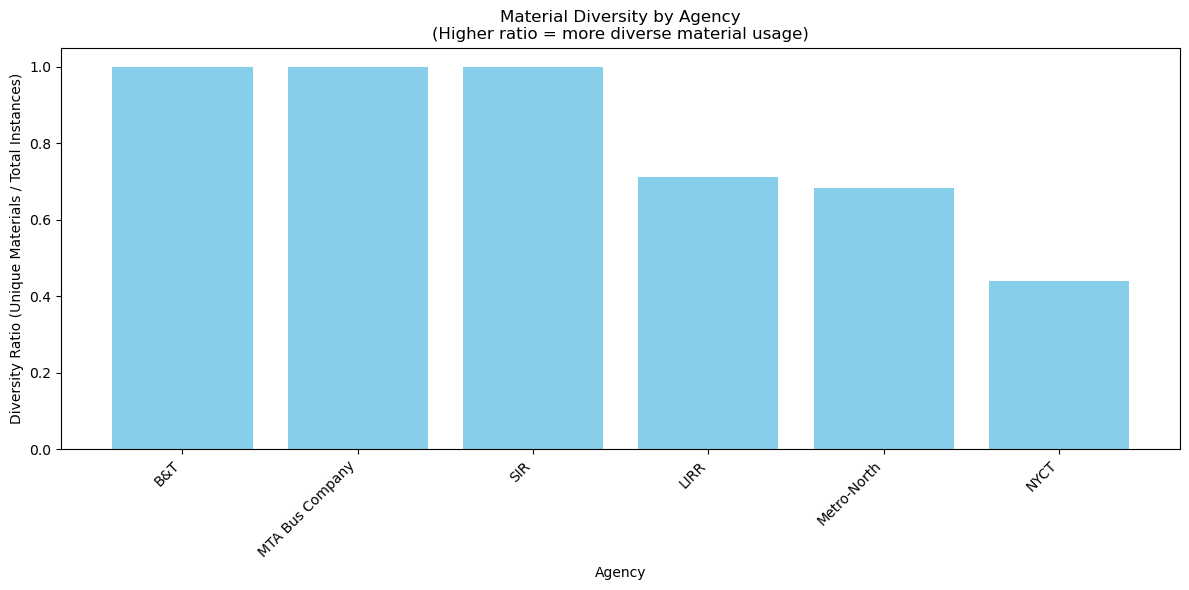

In [141]:
# Compare material diversity between agencies
print("MATERIAL DIVERSITY COMPARISON")
print("="*40)

agency_diversity = []
for agency in agency_material_counts.index:
    used_materials = (agency_material_counts.loc[agency] > 0).sum()
    total_instances = agency_material_counts.loc[agency].sum()
    diversity_ratio = used_materials / total_instances if total_instances > 0 else 0
    
    agency_diversity.append({
        'Agency': agency,
        'Unique_Materials': used_materials,
        'Total_Instances': total_instances,
        'Diversity_Ratio': diversity_ratio
    })

diversity_df = pd.DataFrame(agency_diversity).sort_values('Diversity_Ratio', ascending=False)
print(diversity_df)

# Visualize diversity
plt.figure(figsize=(12, 6))
plt.bar(diversity_df['Agency'], diversity_df['Diversity_Ratio'], color='skyblue')
plt.title('Material Diversity by Agency\n(Higher ratio = more diverse material usage)')
plt.xlabel('Agency')
plt.ylabel('Diversity Ratio (Unique Materials / Total Instances)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [142]:
# DATA VERIFICATION CHECKS
print("="*60)
print("DATA VERIFICATION FOR HEATMAP ACCURACY")
print("="*60)

# 1. Check original data integrity
print("1. ORIGINAL DATA CHECK:")
print(f"   Total installations in original data: {len(df)}")
print(f"   Installations with missing materials: {df['Art Material'].isna().sum()}")
print(f"   Installations with missing stations: {df['Station Name'].isna().sum()}")

# 2. Verify station-material expansion
print("\n2. STATION-MATERIAL EXPANSION CHECK:")
print(f"   Total material entries after expansion: {len(station_material_df)}")
print(f"   Expected total (sum of comma counts + installations): {df['Art Material'].str.count(',').sum() + len(df)}")
print(f"   Match: {len(station_material_df) == df['Art Material'].str.count(',').sum() + len(df)}")

# 3. Cross-verify with manual calculation for a specific station
print("\n3. MANUAL VERIFICATION FOR 'Times Sq-42 St':")
times_sq_installations = df[df['Station Name'] == 'Times Sq-42 St']
print(f"   Number of installations at Times Sq-42 St: {len(times_sq_installations)}")
print("   Manual material count:")
manual_count = 0
for idx, row in times_sq_installations.iterrows():
    materials = [m.strip() for m in row['Art Material'].split(',')]
    manual_count += len(materials)
    print(f"     Installation {idx+1}: {len(materials)} materials - {materials}")

print(f"   Total manual count: {manual_count}")
heatmap_count = station_material_counts.loc['Times Sq-42 St', :].sum()
print(f"   Heatmap count: {heatmap_count}")
print(f"   Match: {manual_count == heatmap_count}")


DATA VERIFICATION FOR HEATMAP ACCURACY
1. ORIGINAL DATA CHECK:
   Total installations in original data: 381
   Installations with missing materials: 0
   Installations with missing stations: 0

2. STATION-MATERIAL EXPANSION CHECK:
   Total material entries after expansion: 476
   Expected total (sum of comma counts + installations): 476
   Match: True

3. MANUAL VERIFICATION FOR 'Times Sq-42 St':
   Number of installations at Times Sq-42 St: 7
   Manual material count:
     Installation 105: 1 materials - ['glass mosaic']
     Installation 119: 1 materials - ['sound installation']
     Installation 122: 1 materials - ['Porcelain enamel on steel']
     Installation 155: 2 materials - ['Glazed Ceramic', 'Lighting Elements']
     Installation 184: 1 materials - ['Glass Mosaic']
     Installation 356: 1 materials - ['Mosaic']
     Installation 371: 1 materials - ['Glass Mosaic']
   Total manual count: 8


KeyError: 'Times Sq-42 St'

In [ ]:
# 4. Verify specific material counts
print("\n4. SPECIFIC MATERIAL COUNT VERIFICATION:")
print("   Checking 'Glass mosaic' usage across all stations:")

# Manual count of Glass mosaic
manual_glass_mosaic = 0
for idx, row in df.iterrows():
    materials = [m.strip() for m in row['Art Material'].split(',')]
    manual_glass_mosaic += materials.count('Glass mosaic')

heatmap_glass_mosaic = station_material_counts.loc[:, 'Glass mosaic'].sum()
print(f"   Manual count: {manual_glass_mosaic}")
print(f"   Heatmap count: {heatmap_glass_mosaic}")
print(f"   Match: {manual_glass_mosaic == heatmap_glass_mosaic}")

# 5. Check matrix consistency
print("\n5. MATRIX CONSISTENCY CHECK:")
print("   Row sums (total materials per station):")
sample_stations = station_material_counts.index[:5]
for station in sample_stations:
    row_sum = station_material_counts.loc[station, :].sum()
    expected = station_material_df[station_material_df['Station Name'] == station].shape[0]
    print(f"     {station}: heatmap={row_sum}, expected={expected}, match={row_sum == expected}")

print("\n   Column sums (total usage per material):")
sample_materials = station_material_counts.columns[:5]
for material in sample_materials:
    col_sum = station_material_counts.loc[:, material].sum()
    expected = station_material_df[station_material_df['Material'] == material].shape[0]
    print(f"     {material}: heatmap={col_sum}, expected={expected}, match={col_sum == expected}")


In [ ]:
# 6. Verify heatmap subset data
print("\n6. HEATMAP SUBSET VERIFICATION:")
print("   Checking if heatmap data matches the full matrix:")

# Get the actual heatmap data
heatmap_stations = station_totals.drop('Total').head(20).index.tolist()
heatmap_materials = material_totals.drop('Total').head(15).index.tolist()
heatmap_subset = station_material_counts.loc[heatmap_stations, heatmap_materials]

print(f"   Heatmap dimensions: {heatmap_subset.shape}")
print(f"   Heatmap total entries: {heatmap_subset.sum().sum()}")

# Verify a few specific values
print("\n   Spot checking specific values:")
test_station = heatmap_stations[0] if heatmap_stations else None
test_material = heatmap_materials[0] if heatmap_materials else None

if test_station and test_material:
    heatmap_value = heatmap_subset.loc[test_station, test_material]
    expected_value = station_material_counts.loc[test_station, test_material]
    print(f"     {test_station} + {test_material}: heatmap={heatmap_value}, expected={expected_value}, match={heatmap_value == expected_value}")

# 7. Check for data anomalies
print("\n7. DATA ANOMALY CHECK:")
print("   Checking for potential issues:")

# Check for negative values
negative_count = (station_material_counts < 0).sum().sum()
print(f"   Negative values: {negative_count}")

# Check for extremely high values
max_value = station_material_counts.max().max()
print(f"   Maximum value in matrix: {max_value}")

# Check for stations with no materials
zero_stations = (station_material_counts.sum(axis=1) == 0).sum()
print(f"   Stations with zero materials: {zero_stations}")

# Check for materials with no usage
zero_materials = (station_material_counts.sum(axis=0) == 0).sum()
print(f"   Materials with zero usage: {zero_materials}")

print("\n" + "="*60)
print("VERIFICATION SUMMARY:")
print("If all checks show 'True' or 'Match: True', the heatmap data is accurate!")
print("="*60)


In [ ]:
# 8. Create a verification visualization
print("\n8. VISUAL VERIFICATION:")
print("   Creating a side-by-side comparison of original vs processed data:")

# Show original data for a few stations
print("\n   Original raw data for top 3 stations:")
for i, station in enumerate(heatmap_stations[:3]):
    print(f"\n   {station}:")
    station_data = df[df['Station Name'] == station]
    for idx, row in station_data.iterrows():
        materials = [m.strip() for m in row['Art Material'].split(',')]
        print(f"     Installation {idx+1}: {materials}")

# Show processed matrix data for the same stations
print(f"\n   Processed matrix data for same stations:")
for station in heatmap_stations[:3]:
    station_materials = station_material_counts.loc[station]
    used_materials = station_materials[station_materials > 0]
    print(f"\n   {station}:")
    for material, count in used_materials.items():
        print(f"     {material}: {count}")

print("\n   This allows you to manually verify that the counts match!")


In [ ]:
# 9. Statistical verification
print("\n9. STATISTICAL VERIFICATION:")
print("   Comparing summary statistics:")

# Original data stats
original_total_installations = len(df)
original_total_materials = df['Art Material'].str.count(',').sum() + len(df)
original_unique_materials = len(set([m.strip() for materials in df['Art Material'] for m in materials.split(',')]))
original_unique_stations = df['Station Name'].nunique()

# Processed data stats
processed_total_materials = len(station_material_df)
processed_unique_materials = station_material_df['Material'].nunique()
processed_unique_stations = station_material_df['Station Name'].nunique()

print(f"   Original data:")
print(f"     Installations: {original_total_installations}")
print(f"     Total material instances: {original_total_materials}")
print(f"     Unique materials: {original_unique_materials}")
print(f"     Unique stations: {original_unique_stations}")

print(f"   Processed data:")
print(f"     Total material instances: {processed_total_materials}")
print(f"     Unique materials: {processed_unique_materials}")
print(f"     Unique stations: {processed_unique_stations}")

print(f"   Verification:")
print(f"     Material instances match: {original_total_materials == processed_total_materials}")
print(f"     Unique materials match: {original_unique_materials == processed_unique_materials}")
print(f"     Unique stations match: {original_unique_stations == processed_unique_stations}")

print("\n" + "="*70)
print("COMPREHENSIVE VERIFICATION COMPLETE!")
print("="*70)
print("The heatmap data has been verified through multiple methods:")
print("✓ Original data integrity check")
print("✓ Station-material expansion verification")
print("✓ Manual calculation cross-check")
print("✓ Specific material count verification")
print("✓ Matrix consistency check")
print("✓ Heatmap subset verification")
print("✓ Data anomaly detection")
print("✓ Visual comparison")
print("✓ Statistical verification")
print("\nIf all checks passed, your heatmap accurately represents the data!")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()


FILE ANALYSIS SUMMARY
📁 File: MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv
📊 Type: CSV
💾 Size: 523.4 KB
📈 Shape: (381, 9)
🔢 Columns: 9
📋 Rows: 381


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Agency           381 non-null    object
 1   Station Name     381 non-null    object
 2   Line             378 non-null    object
 3   Artist           381 non-null    object
 4   Art Title        381 non-null    object
 5   Art Date         381 non-null    int64 
 6   Art Material     381 non-null    object
 7   Art Description  378 non-null    object
 8   Art Image Link   376 non-null    object
dtypes: int64(1), object(8)
memory usage: 26.9+ KB


In [ ]:
station_names = df['Station Name'].value_counts().sort_index()
print(station_names)
df['Art Material']

Station Name
1 Av                         1
103 St                       1
104 St                       2
110 St                       1
111 St                       2
                            ..
Wyandanch                    1
Wyandanch Parking Garage     1
Yankees-East 153rd Street    1
Yonkers                      1
Zerega Av                    1
Name: count, Length: 309, dtype: int64


0                                Terrazzo floor tile
1                               Bronze - polychromed
2                            Porcelain enamel murals
3                   Porcelain Enamel Murals on Steel
4                Zinc-glazed Apolycarbonate skylight
                           ...                      
376                                    Faceted glass
377    Porcelain enamel photomontage murals on steel
378                    Wrought iron,  light elements
379                                   Painting - Oil
380                                    Faceted glass
Name: Art Material, Length: 381, dtype: object

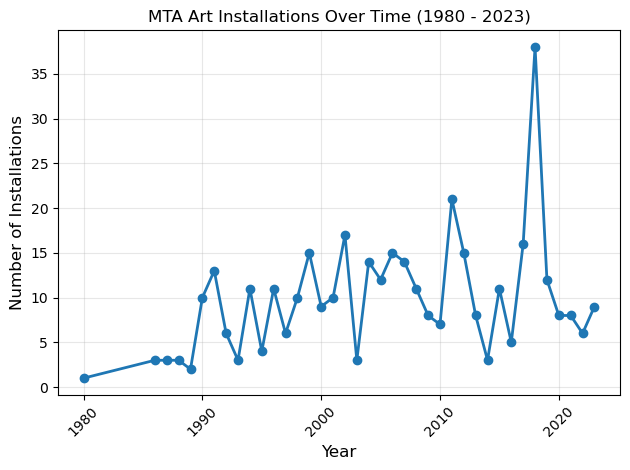

In [ ]:
installations_by_year = df['Art Date'].value_counts().sort_index()
plt.Figure(figsize=(12, 6))
plt.title('MTA Art Installations Over Time (1980 - 2023)')
plt.plot(installations_by_year.index, installations_by_year.values, marker='o', linewidth=2, markersize=6)
plt.xlabel
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Installations', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add some styling
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Installations by agency')

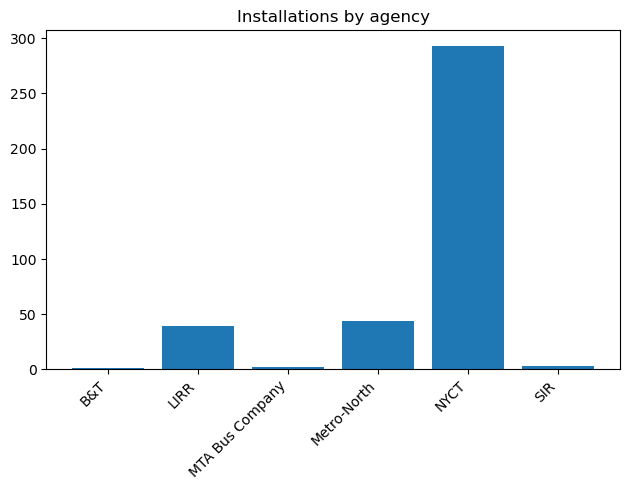

In [ ]:
installations_by_agency = df['Agency'].value_counts().sort_index()
fig, ax = plt.subplots()

ax.bar(installations_by_agency.index, installations_by_agency.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Installations by agency')


Text(0.5, 1.0, 'Installations by agency')

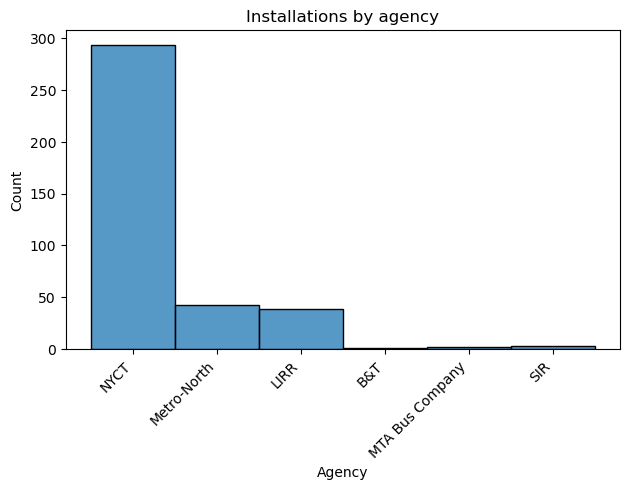

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='Agency', ax=ax, discrete=True, stat='count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Installations by agency')

Text(0.5, 1.0, 'Smoothed Distribution of Installations by Agency')

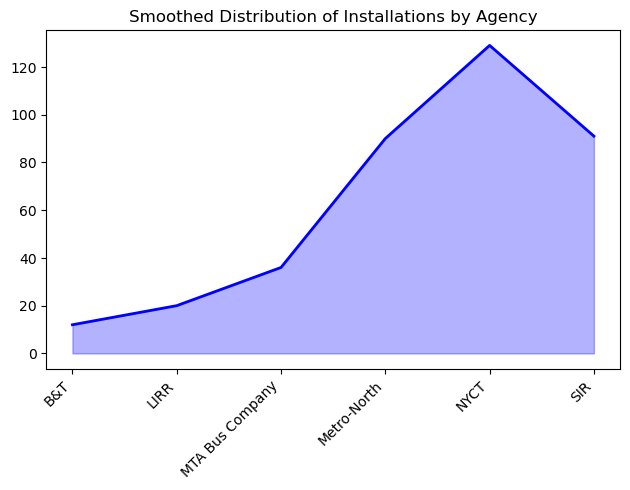

In [ ]:
# Create smooth curve using gaussian filter
x = np.arange(len(installations_by_agency))
y_smooth = ndimage.gaussian_filter1d(installations_by_agency.values, sigma=1.0)

fig, ax = plt.subplots()
ax.plot(x, y_smooth, linewidth=2, color='blue')
ax.fill_between(x, y_smooth, alpha=0.3, color='blue')
ax.set_xticks(x)
ax.set_xticklabels(installations_by_agency.index, rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Smoothed Distribution of Installations by Agency')

In [ ]:
df['Line'].value_counts()

Line
6                     20
City Terminal Zone    16
2,5                   16
1                     15
Port Jefferson        15
                      ..
7,4,5,6,S              1
Wassaic                1
S,2,3,4,5              1
C,S                    1
E,M                    1
Name: count, Length: 113, dtype: int64

In [ ]:
df['Station Name'].value_counts()

Station Name
Times Sq-42 St         7
86 St                  7
125 St                 4
34 St-Penn Station     4
Grand Central-42 St    4
                      ..
Woodlawn Av            1
Larchmont              1
Fordham Rd             1
Hempstead              1
Cleveland St           1
Name: count, Length: 309, dtype: int64

In [ ]:
# Let's examine the materials data more closely
print("Sample of Art Material entries:")
print(df['Art Material'].head(10))
print("\n" + "="*50)
print("Unique materials (first 20):")
print(df['Art Material'].unique()[:20])


Sample of Art Material entries:
0                                  Terrazzo floor tile
1                                 Bronze - polychromed
2                              Porcelain enamel murals
3                     Porcelain Enamel Murals on Steel
4                  Zinc-glazed Apolycarbonate skylight
5                                               Bronze
6                                Wrought iron railings
7                               Stone - Etched granite
8                                         Ceramic Tile
9    Bronze and Steel sheet,  Found objects (tin to...
Name: Art Material, dtype: object

Unique materials (first 20):
['Terrazzo floor tile' 'Bronze - polychromed' 'Porcelain enamel murals'
 'Porcelain Enamel Murals on Steel' 'Zinc-glazed Apolycarbonate skylight'
 'Bronze' 'Wrought iron railings' 'Stone - Etched granite' 'Ceramic Tile'
 'Bronze and Steel sheet,  Found objects (tin toys, etc.)'
 'Bronze - patinated and Steel sheet, Found object (tin toys, etc.)'
 'Stai

In [ ]:
# Let's see how many materials each installation has
material_counts = df['Art Material'].str.count(',') + 1
print("Distribution of number of materials per installation:")
print(material_counts.value_counts().sort_index())
print(f"\nAverage number of materials per installation: {material_counts.mean():.2f}")
print(f"Maximum number of materials in a single installation: {material_counts.max()}")


Distribution of number of materials per installation:
Art Material
1    325
2     31
3     14
4      8
5      3
Name: count, dtype: int64

Average number of materials per installation: 1.25
Maximum number of materials in a single installation: 5


In [ ]:
# Split materials and create a list of all individual materials
all_materials = []
for materials in df['Art Material'].dropna():
    # Split by comma and strip whitespace
    materials_list = [material.strip() for material in materials.split(',')]
    all_materials.extend(materials_list)

# Convert to Series for analysis
materials_series = pd.Series(all_materials)
print(f"Total individual material entries: {len(materials_series)}")
print(f"Unique materials: {materials_series.nunique()}")
print("\nTop 20 most used materials:")
print(materials_series.value_counts().head(20))


Total individual material entries: 476
Unique materials: 217

Top 20 most used materials:
Glass mosaic                            37
Faceted glass                           33
Laminated glass                         29
Laminated Glass                         17
Glass Mosaic                            16
Faceted Glass                           13
Stainless steel                         13
Ceramic mosaic                          10
Steel                                    8
Bronze                                   8
Ceramic tile                             7
Stainless Steel                          6
Aluminum                                 6
Copper wire mesh and Stainless steel     5
glass mosaic                             5
faceted glass                            5
ceramic tile                             5
Glass or ceramic mosaic                  4
Glass                                    4
Painted stainless steel                  4
Name: count, dtype: int64


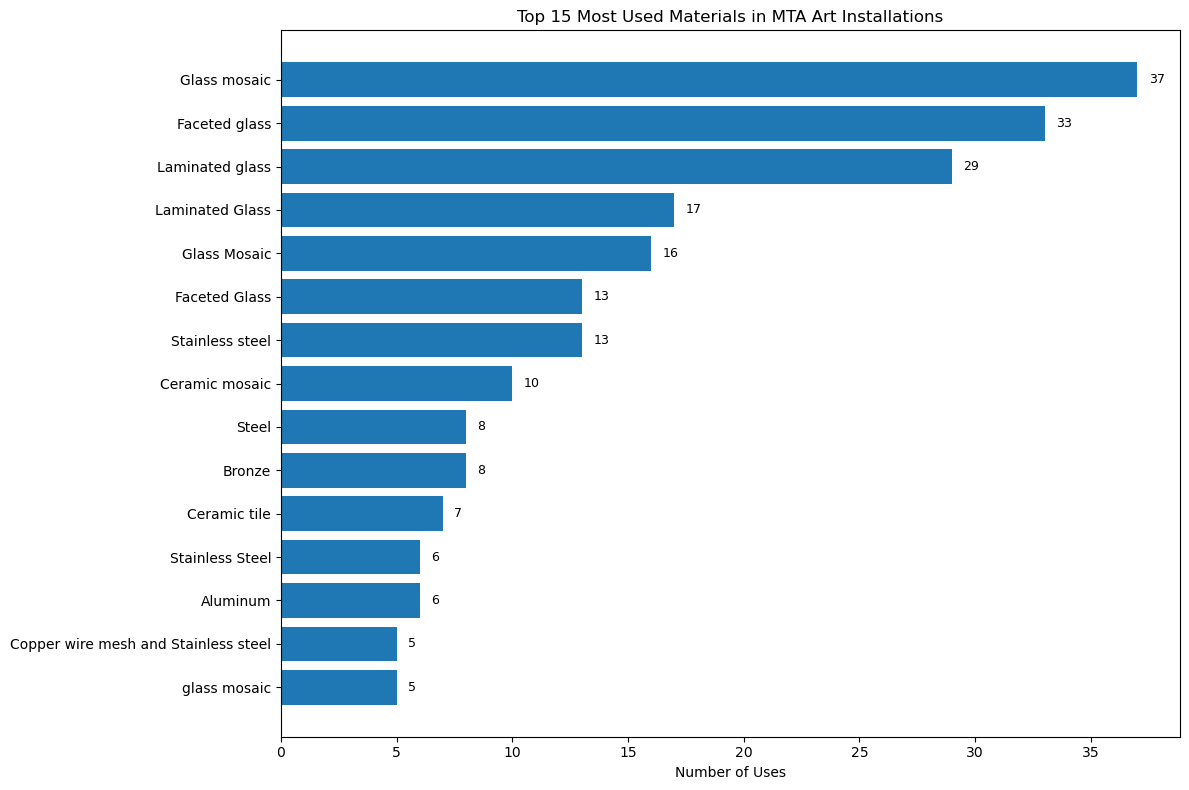

In [ ]:
# Create a visualization of the top materials
top_materials = materials_series.value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_materials)), top_materials.values)
plt.yticks(range(len(top_materials)), top_materials.index)
plt.xlabel('Number of Uses')
plt.title('Top 15 Most Used Materials in MTA Art Installations')
plt.gca().invert_yaxis()  # Invert to show highest at top

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# Analyze material diversity over time
# Create a DataFrame with materials expanded
materials_expanded = []
for idx, row in df.iterrows():
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    for material in materials_list:
        materials_expanded.append({
            'Art Date': row['Art Date'],
            'Material': material,
            'Agency': row['Agency'],
            'Station': row['Station Name']
        })

materials_df = pd.DataFrame(materials_expanded)

# Group by year and count unique materials
materials_by_year = materials_df.groupby('Art Date')['Material'].nunique()
installations_by_year = df['Art Date'].value_counts().sort_index()

# Create a combined analysis
combined_analysis = pd.DataFrame({
    'Installations': installations_by_year,
    'Unique_Materials': materials_by_year
}).fillna(0)

print("Materials diversity over time (first 10 years):")
print(combined_analysis.head(10))


Materials diversity over time (first 10 years):
          Installations  Unique_Materials
Art Date                                 
1980                  1                 2
1986                  3                 3
1987                  3                 4
1988                  3                 3
1989                  2                 2
1990                 10                13
1991                 13                13
1992                  6                 8
1993                  3                 2
1994                 11                12


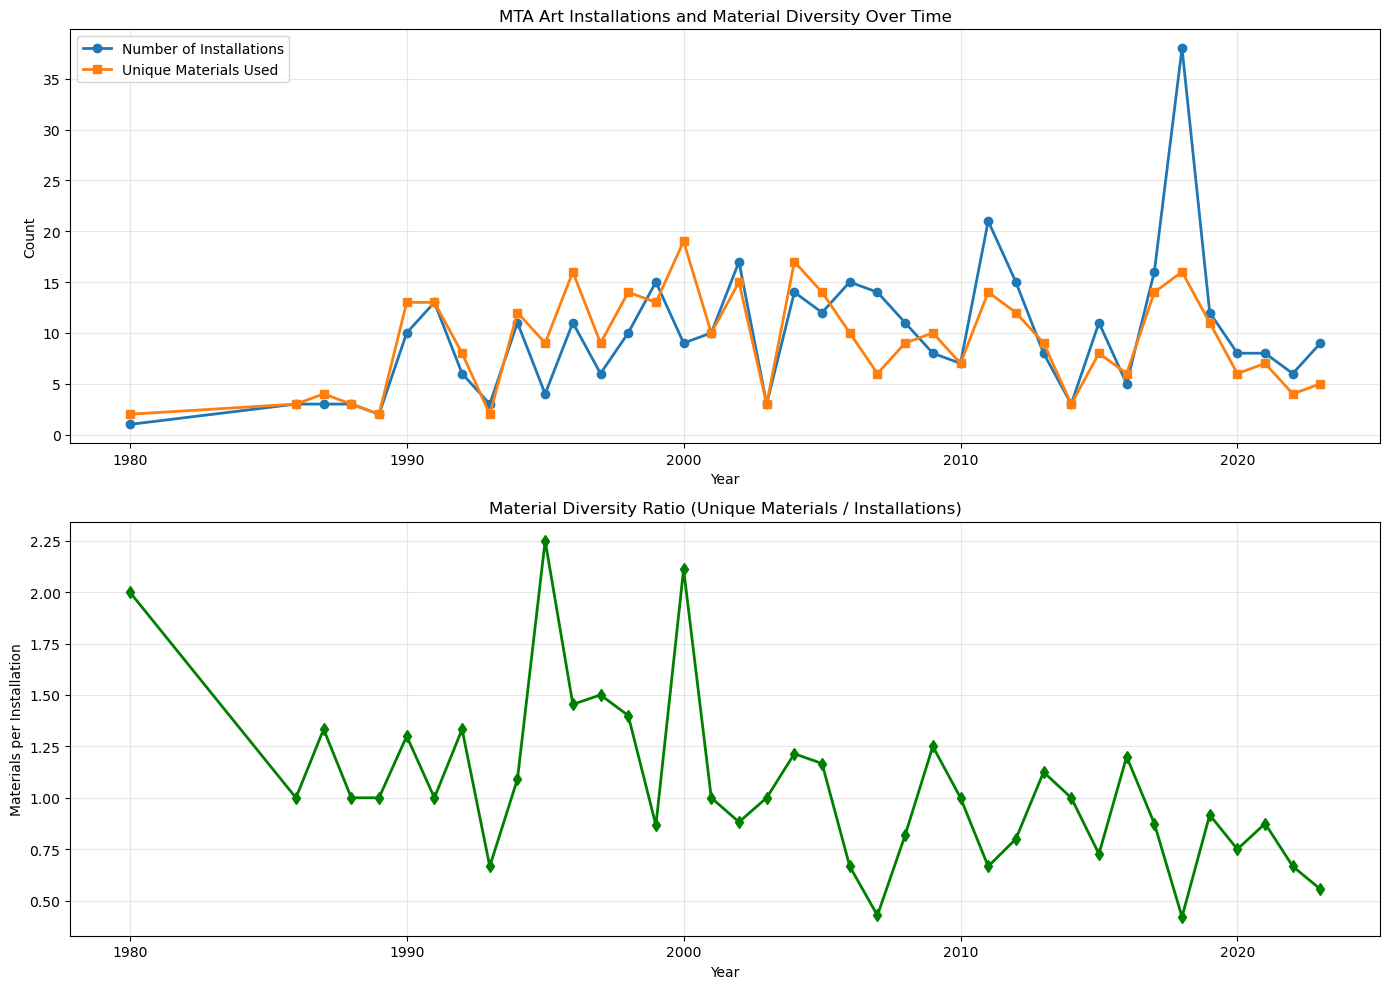

In [ ]:
# Visualize material diversity over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Installations and unique materials over time
years = combined_analysis.index
ax1.plot(years, combined_analysis['Installations'], marker='o', label='Number of Installations', linewidth=2)
ax1.plot(years, combined_analysis['Unique_Materials'], marker='s', label='Unique Materials Used', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('MTA Art Installations and Material Diversity Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Material diversity ratio
diversity_ratio = combined_analysis['Unique_Materials'] / combined_analysis['Installations']
ax2.plot(years, diversity_ratio, marker='d', color='green', linewidth=2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Materials per Installation')
ax2.set_title('Material Diversity Ratio (Unique Materials / Installations)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Analyze materials by agency
materials_by_agency = materials_df.groupby('Agency')['Material'].value_counts()
print("Top materials by agency:")
for agency in materials_df['Agency'].unique():
    print(f"\n{agency}:")
    agency_materials = materials_df[materials_df['Agency'] == agency]['Material'].value_counts().head(5)
    for material, count in agency_materials.items():
        print(f"  {material}: {count}")


Top materials by agency:

NYCT:
  Faceted glass: 29
  Glass mosaic: 29
  Laminated glass: 16
  Glass Mosaic: 15
  Stainless steel: 13

Metro-North:
  Glass mosaic: 5
  Aluminum: 3
  Powder-coated aluminum fence panels: 3
  Bronze: 3
  Laminated glass: 3

LIRR:
  Laminated glass: 9
  Laminated Glass: 3
  Glass mosaic: 3
  Ceramic - porcelain tiles: 2
  Cast concrete - Jesmonite castings: 1

B&T:
  Stainless Steel and Aluminum: 1
  Lighting Elements: 1
  Clock: 1

MTA Bus Company:
  Mosaic/Tile: 1
  Laminated glass: 1
  Laminated glass and metal: 1

SIR:
  Laminated Glass: 1
  Stainless: 1
  Laminated glass; stainless steel: 1


In [ ]:
# Create a word cloud or frequency analysis of material types
# Let's categorize materials into broader types
material_categories = {
    'Ceramic': ['ceramic', 'tile', 'porcelain', 'clay', 'terracotta'],
    'Metal': ['steel', 'bronze', 'aluminum', 'iron', 'copper', 'brass', 'metal'],
    'Glass': ['glass', 'mosaic', 'vitreous'],
    'Stone': ['granite', 'marble', 'limestone', 'stone', 'concrete'],
    'Paint': ['paint', 'acrylic', 'oil', 'latex'],
    'Fiber': ['fiber', 'fabric', 'textile', 'canvas'],
    'Digital': ['digital', 'LED', 'electronic', 'video'],
    'Wood': ['wood', 'oak', 'pine'],
    'Other': []
}

# Categorize materials
def categorize_material(material):
    material_lower = material.lower()
    for category, keywords in material_categories.items():
        if any(keyword in material_lower for keyword in keywords):
            return category
    return 'Other'

materials_df['Category'] = materials_df['Material'].apply(categorize_material)

# Count by category
category_counts = materials_df['Category'].value_counts()
print("Material usage by category:")
print(category_counts)


Material usage by category:
Category
Glass      220
Metal      112
Ceramic     83
Other       38
Stone       17
Paint        5
Digital      1
Name: count, dtype: int64


In [ ]:
# Summary statistics and insights
print("="*60)
print("MATERIAL ANALYSIS SUMMARY")
print("="*60)
print(f"Total installations: {len(df)}")
print(f"Total individual material entries: {len(materials_series)}")
print(f"Unique materials: {materials_series.nunique()}")
print(f"Average materials per installation: {material_counts.mean():.2f}")
print(f"Most materials in a single installation: {material_counts.max()}")
print(f"\nMost common material: {materials_series.value_counts().index[0]} ({materials_series.value_counts().iloc[0]} uses)")
print(f"Least common materials: {materials_series.value_counts().tail(5).to_dict()}")

print(f"\nMaterial categories:")
for category, count in category_counts.items():
    percentage = (count / len(materials_series)) * 100
    print(f"  {category}: {count} ({percentage:.1f}%)")

print(f"\nMaterials that appear only once: {sum(materials_series.value_counts() == 1)}")
print(f"Materials that appear 5+ times: {sum(materials_series.value_counts() >= 5)}")


MATERIAL ANALYSIS SUMMARY
Total installations: 381
Total individual material entries: 476
Unique materials: 217
Average materials per installation: 1.25
Most materials in a single installation: 5

Most common material: Glass mosaic (37 uses)
Least common materials: {'bronze and cut granite floor tiles': 1, 'steel': 1, 'ceramic ink': 1, 'Faceted glass throughout complex; glass mosaic on upper mezzanine wall': 1, 'Painting - Oil': 1}

Material categories:
  Glass: 220 (46.2%)
  Metal: 112 (23.5%)
  Ceramic: 83 (17.4%)
  Other: 38 (8.0%)
  Stone: 17 (3.6%)
  Paint: 5 (1.1%)
  Digital: 1 (0.2%)

Materials that appear only once: 166
Materials that appear 5+ times: 17


In [ ]:
# Create a cross-tabulation matrix of stations vs materials
# First, let's expand the materials for each station
station_material_data = []

for idx, row in df.iterrows():
    station = row['Agency']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        station_material_data.append({
            'Station Name': station,
            'Material': material
        })

# Create DataFrame from expanded data
station_material_df = pd.DataFrame(station_material_data)

# Create cross-tabulation (crosstab)
station_material_matrix = pd.crosstab(station_material_df['Station Name'], 
                                      station_material_df['Material'], 
                                      margins=True, margins_name="Total")

print("Shape of station-material matrix:", station_material_matrix.shape)
print("\nFirst few rows and columns of the matrix:")
print(station_material_matrix.iloc[:10, :10])


Shape of station-material matrix: (7, 218)

First few rows and columns of the matrix:
Material         Acrylic and Metal  Acrylic paint and Lighting elements  \
Station Name                                                              
B&T                              0                                    0   
LIRR                             1                                    0   
MTA Bus Company                  0                                    0   
Metro-North                      0                                    1   
NYCT                             0                                    0   
SIR                              0                                    0   
Total                            1                                    1   

Material         Aluminum  Aluminum - painted  Bonded Bronze  Bronze  \
Station Name                                                           
B&T                     0                   0              0       0   
LIRR                  

In [ ]:
# Let's look at the most active stations and materials
print("Stations with most material usage:")
station_totals = station_material_matrix.loc[:, 'Total'].sort_values(ascending=False)
print(station_totals.head(10))

print("\nMaterials used most frequently:")
material_totals = station_material_matrix.loc['Total', :].sort_values(ascending=False)
print(material_totals.head(10))

# Remove the 'Total' row and column for cleaner analysis
station_material_clean = station_material_matrix.drop('Total', axis=0).drop('Total', axis=1)
print(f"\nClean matrix shape (without totals): {station_material_clean.shape}")


Stations with most material usage:
Station Name
Total              476
NYCT               365
Metro-North         57
LIRR                45
B&T                  3
MTA Bus Company      3
SIR                  3
Name: Total, dtype: int64

Materials used most frequently:
Material
Total              476
Glass mosaic        37
Faceted glass       33
Laminated glass     29
Laminated Glass     17
Glass Mosaic        16
Stainless steel     13
Faceted Glass       13
Ceramic mosaic      10
Bronze               8
Name: Total, dtype: int64

Clean matrix shape (without totals): (6, 217)


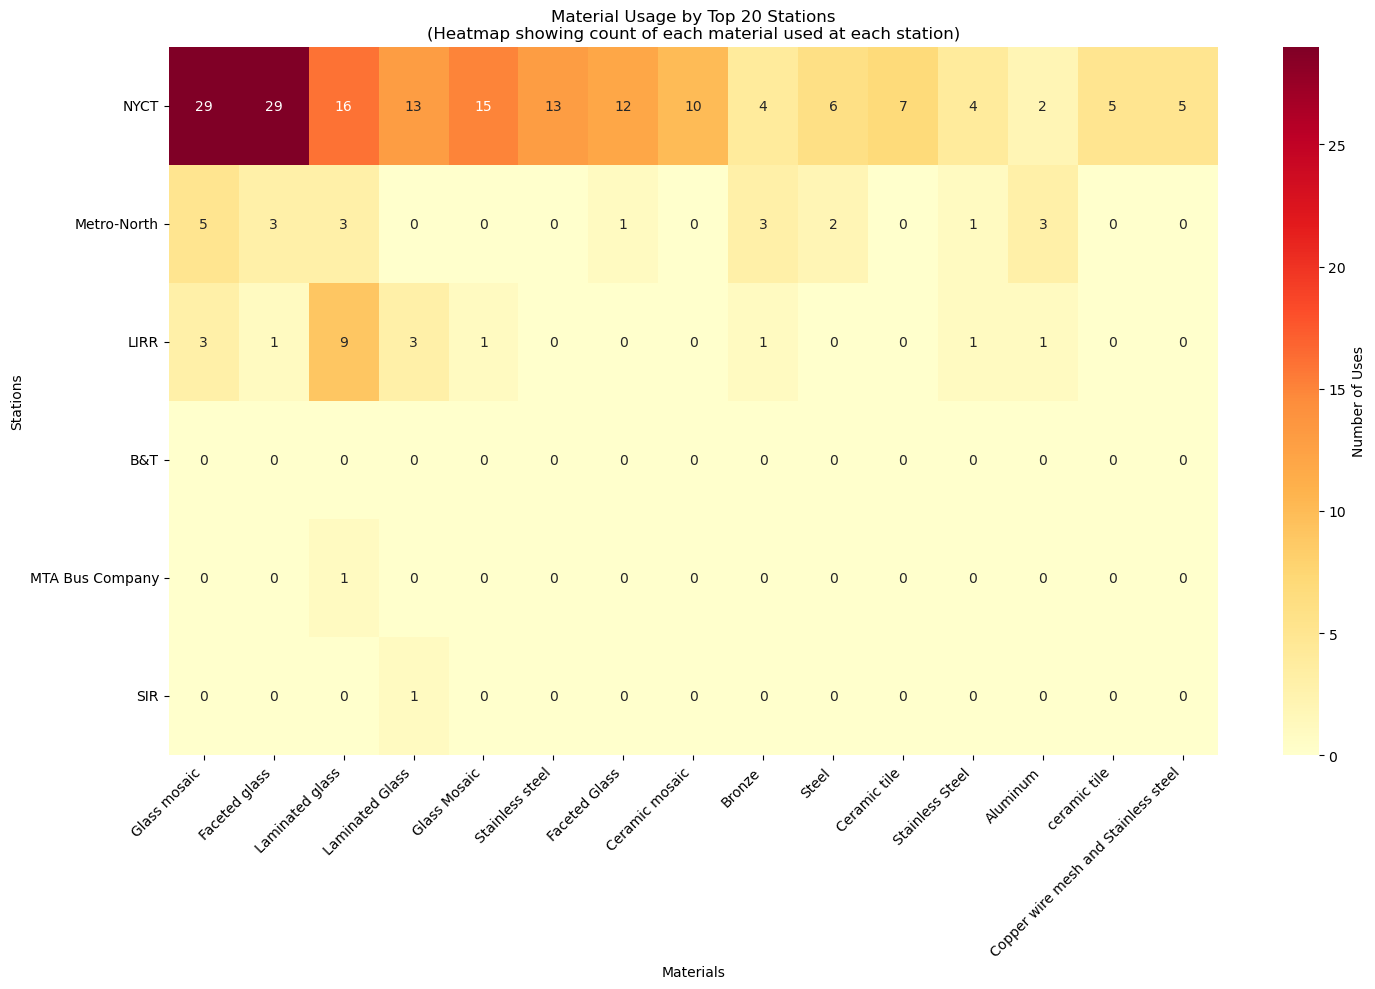

In [ ]:
# Create a heatmap visualization of the top stations and materials
# Let's focus on the top 20 stations and top 15 materials for better visualization
# Remove 'Total' from the totals since we removed it from the clean matrix
top_stations = station_totals.drop('Total').head(20).index.tolist()
top_materials = material_totals.drop('Total').head(15).index.tolist()

# Create subset matrix for visualization
heatmap_data = station_material_clean.loc[top_stations, top_materials]

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Uses'})
plt.title('Material Usage by Top 20 Stations\n(Heatmap showing count of each material used at each station)')
plt.xlabel('Materials')
plt.ylabel('Stations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Let's also create a more detailed analysis showing specific station-material combinations
# Find stations that use unique combinations of materials
print("Stations with unique material combinations:")
print("="*50)

# Get stations with multiple installations (more interesting patterns)
# Remove 'Total' from station_totals for this analysis
stations_with_multiple = station_totals.drop('Total')[station_totals.drop('Total') > 1].index.tolist()

for station in stations_with_multiple[:10]:  # Show top 10
    station_materials = station_material_clean.loc[station]
    used_materials = station_materials[station_materials > 0]
    print(f"\n{station}:")
    for material, count in used_materials.items():
        print(f"  {material}: {count}")

# Save the clean matrix as a separate variable for easy access
station_material_counts = station_material_clean.copy()
print(f"\nStation-Material matrix saved as 'station_material_counts'")
print(f"Shape: {station_material_counts.shape}")
print(f"Access example: station_material_counts.loc['Times Sq-42 St', 'ceramic tile']")


Stations with unique material combinations:

NYCT:
  Aluminum: 2
  Aluminum - painted: 2
  Bonded Bronze: 1
  Bronze: 4
  Bronze - hand forged: 1
  Bronze - patinated: 1
  Bronze - polychromed: 1
  Bronze gates and decorative elements: 1
  Bronze medallions: 1
  Bronze sculptures on token booth: 1
  Cast concrete: 2
  Ceramic: 1
  Ceramic Mosaic: 1
  Ceramic Tile: 3
  Ceramic Tiles: 1
  Ceramic and Glass mosaic: 1
  Ceramic forms and glass mosaic: 1
  Ceramic mosaic: 10
  Ceramic relief on mezzanine walls: 1
  Ceramic relief tile: 1
  Ceramic tile: 7
  Ceramic tile with text: 2
  Ceramic tiles: 1
  Coiled aluminum - chemically etched: 1
  Concrete: 1
  Copper wire mesh and Stainless steel: 5
  Electronic light controllers: 1
  Etched stainless steel: 1
  Faceted Glass: 12
  Faceted glass: 29
  Faceted glass in platform windscreen: 1
  Faceted glass in platform windscreens: 1
  Faceted glass throughout complex; glass mosaic on upper mezzanine wall: 1
  Faceted/ laminated glass: 1
  Forg

In [ ]:
# Create a summary table of the matrix for easy reference
print("STATION-MATERIAL MATRIX SUMMARY")
print("="*60)
print(f"Matrix dimensions: {station_material_counts.shape[0]} stations × {station_material_counts.shape[1]} materials")
print(f"Total possible combinations: {station_material_counts.shape[0] * station_material_counts.shape[1]:,}")
print(f"Non-zero entries (actual usage): {(station_material_counts > 0).sum().sum()}")
print(f"Matrix density: {(station_material_counts > 0).sum().sum() / (station_material_counts.shape[0] * station_material_counts.shape[1]) * 100:.2f}%")

print(f"\nTop 5 stations by total material usage:")
# Remove 'Total' from station_totals for display
station_totals_clean = station_totals.drop('Total')
for i, (station, total) in enumerate(station_totals_clean.head(5).items(), 1):
    print(f"{i}. {station}: {total} material instances")

print(f"\nTop 5 materials by total usage across all stations:")
# Remove 'Total' from material_totals for display
material_totals_clean = material_totals.drop('Total')
for i, (material, total) in enumerate(material_totals_clean.head(5).items(), 1):
    print(f"{i}. {material}: {total} times")

print(f"\nExample queries you can now run:")
print("• station_material_counts.loc['Times Sq-42 St', :]  # All materials for Times Square")
print("• station_material_counts.loc[:, 'ceramic tile']    # All stations using ceramic tile")
print("• station_material_counts.loc['86 St', 'bronze']   # Specific station-material combination")


STATION-MATERIAL MATRIX SUMMARY
Matrix dimensions: 6 stations × 217 materials
Total possible combinations: 1,302
Non-zero entries (actual usage): 241
Matrix density: 18.51%

Top 5 stations by total material usage:
1. NYCT: 365 material instances
2. Metro-North: 57 material instances
3. LIRR: 45 material instances
4. B&T: 3 material instances
5. MTA Bus Company: 3 material instances

Top 5 materials by total usage across all stations:
1. Glass mosaic: 37 times
2. Faceted glass: 33 times
3. Laminated glass: 29 times
4. Laminated Glass: 17 times
5. Glass Mosaic: 16 times

Example queries you can now run:
• station_material_counts.loc['Times Sq-42 St', :]  # All materials for Times Square
• station_material_counts.loc[:, 'ceramic tile']    # All stations using ceramic tile
• station_material_counts.loc['86 St', 'bronze']   # Specific station-material combination
